# Credit Card Payment Default Prediction
Credit card is a flexible tool by which a customer can use a bank's money for a short period of time. Predicting accurately which customers are most probable to default represents a significant business opportunity for all banks. Bank cards are the most common credit card type in Taiwan, which emphasizes the impact of risk prediction on both the consumers and banks. This would inform the bank’s decisions on criteria to approve a credit card application and also decide upon what credit limit to provide. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. Using the information given, predict the probability of a customer defaulting in the next month.

# About the Data
ID : Unique ID of each client

LIMIT_BAL : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit

SEX : Gender (1=male, 2=female)

EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE : Marital status (1=married, 2=single, 3=divorced)

AGE : Age of the client

PAY_0 : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2 : Repayment status in August, 2005 (scale same as above)

PAY_3 : Repayment status in July, 2005 (scale same as above)

PAY_4 : Repayment status in June, 2005 (scale same as above)

PAY_5 : Repayment status in May, 2005 (scale same as above)

PAY_6 : Repayment status in April, 2005 (scale same as above)

BILL_AMT1 : Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2 : Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3 : Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4 : Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5 : Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6
: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1
: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2
: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3
: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4
: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5
: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6
: Amount of previous payment in April, 2005 (NT dollar)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab

In [2]:
df = pd.read_csv('train_20D8GL3.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


# 1. Feature Engineering

First we should understand the data. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

As we can see every columns have integer data type and there is no null values.

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,-0.260952,-0.288667,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,1.141454,1.151592,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


In [8]:
# ID is unique for every row so we can delete it. In the other hand, we can use index to identify every row
df.drop('ID',axis=1,inplace=True)

In [9]:
# We can classify the data between categorical, numerical, and target values
categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numerical = ['LIMIT_BAL', 'AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
         'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = 'default_payment_next_month'

In [10]:
df[categorical].head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,2,-1,-1,-1,-1,-1,-1
1,2,1,2,2,2,-2,-1,0,-1
2,2,2,1,0,0,0,0,0,0
3,2,2,2,-1,-1,-2,-2,-2,-2
4,1,3,1,-1,0,0,0,0,0


In [11]:
df[numerical].head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,360000,25,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043
1,240000,46,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074
2,320000,41,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500
3,50000,24,2675,0,0,0,0,0,0,0,0,0,0,0
4,80000,52,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449


### Categorical Values

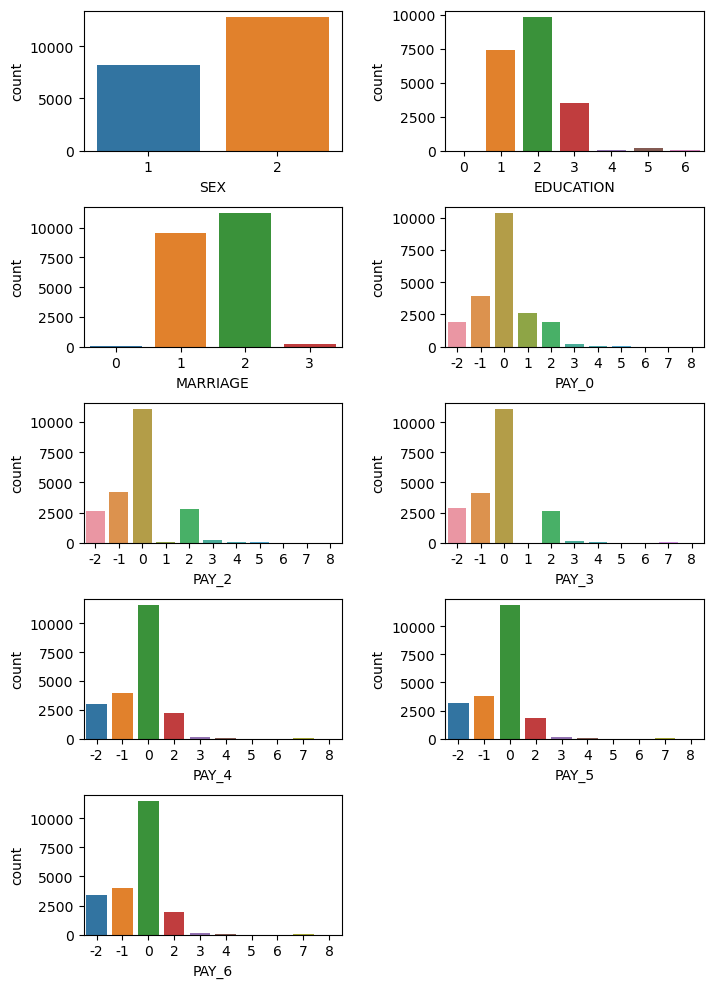

In [12]:
# Make a count plot for categorical values
plt.figure(figsize=(8, 12))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for n, feature in enumerate(categorical):
    ax = plt.subplot(5, 2, n + 1)
    sns.countplot(x = df[feature])

We want to change SEX column so that the encoded number start from 0. Also, it really weird that there is 0 values in EDUCATION and MARRIAGE columns.

In [13]:
df['SEX']= df['SEX'].apply(lambda x : 0 if x==2 else x)

In [14]:
df[df['EDUCATION']==0].head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
873,200000,1,0,2,40,1,-2,-1,-1,-1,-2,0,0,200,1000,0,0,0,200,1000,0,0,0,0
7497,290000,0,0,2,38,1,-1,-1,-1,-1,-1,0,1437,3070,1406,2196,1481,1437,3078,1406,2196,1481,0,0
8305,210000,1,0,2,45,-2,-2,-2,-2,-2,-2,2563,5854,1032,788,3499,3372,5854,1032,788,3565,3372,15381,0
9022,50000,0,0,1,40,0,0,0,0,0,0,44749,46229,46798,47647,40500,41921,2229,2298,2100,2500,1921,8432,0
9718,270000,1,0,2,39,1,-1,-1,-1,-1,-2,0,10193,69553,18607,0,0,10193,70213,19008,399,0,0,0


EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
As we can see, 5 and 6 are classified as unknown and there is 0 that is not classified as anything so I wanted to classified 0,5,6 as others and encoded it as 0

In [15]:
df['EDUCATION']= df['EDUCATION'].apply(lambda x : 0 if x==5 or x==6 or x==4 else x)

In [16]:
df[df['MARRIAGE']==0].head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
439,80000,0,3,0,37,-2,-2,-2,-2,-2,-2,600,0,0,0,0,0,0,0,0,0,0,0,0
1068,200000,1,3,0,36,-2,-2,-2,-2,-2,-2,5644,82620,14129,41359,9140,0,89187,14178,41359,9140,0,0,0
1476,110000,0,3,0,31,0,0,0,0,0,0,89989,84229,79288,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
1624,50000,0,1,0,45,-1,-1,-2,-2,-1,2,4736,0,0,0,4881,4634,0,0,0,4881,0,0,0
1766,50000,1,3,0,50,0,0,0,0,0,0,9404,10745,12058,13256,14437,16985,1500,1500,1400,1400,2800,0,0


For marriage column we can keep it like this and assume 0 for new categorical values

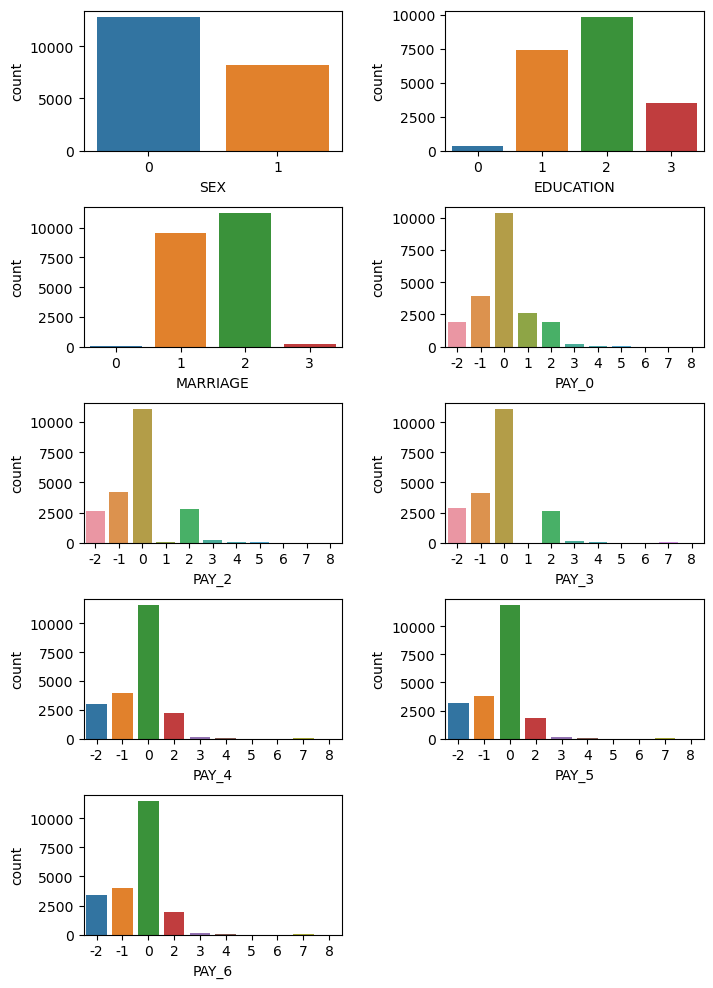

In [17]:
# Make a count plot for categorical values
plt.figure(figsize=(8, 12))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for n, feature in enumerate(categorical):
    ax = plt.subplot(5, 2, n + 1)
    sns.countplot(x = df[feature])

SEX : Gender (0=female, 1=male)

EDUCATION : (0=others, 1=graduate school, 2=university, 3=high school)

MARRIAGE : Marital status (1=married, 2=single, 3=divorced)

### Numerical Values

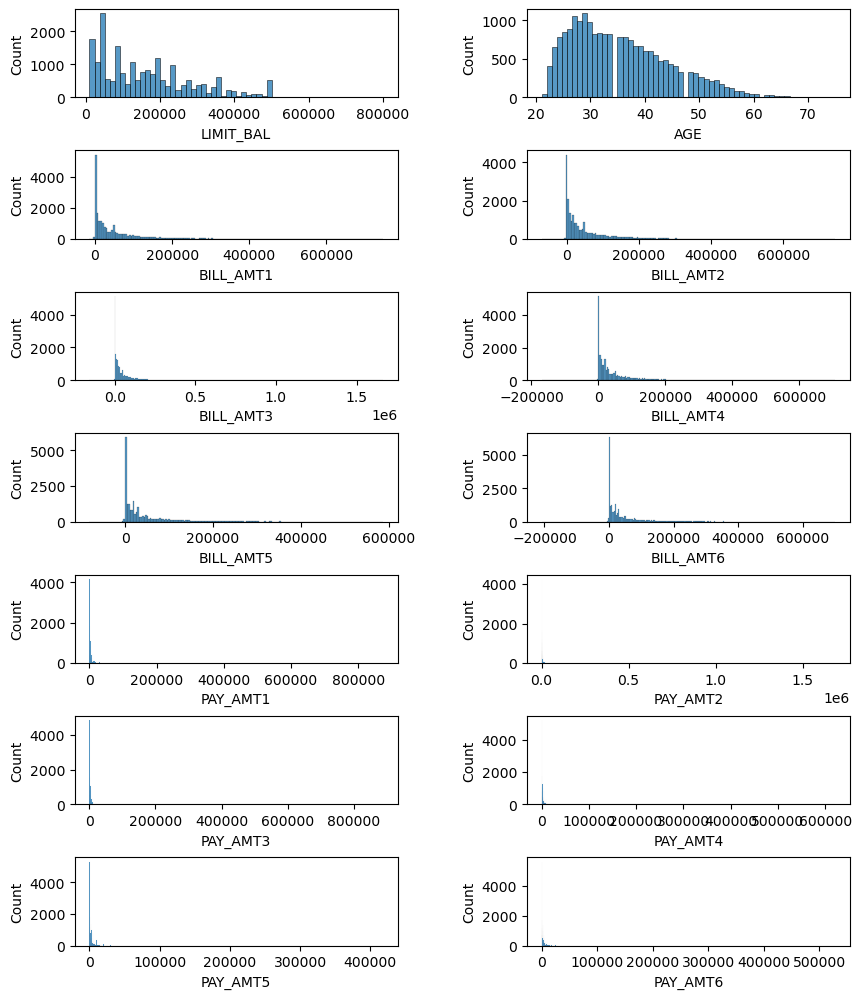

In [18]:
# Make a histogram for categorical values
plt.figure(figsize=(10, 14))
plt.subplots_adjust(hspace=0.6,wspace=0.4)
for n, feature in enumerate(numerical):
    ax = plt.subplot(8, 2, n + 1)
    sns.histplot(df[feature])

It look like all columns are skewed and have many outliers

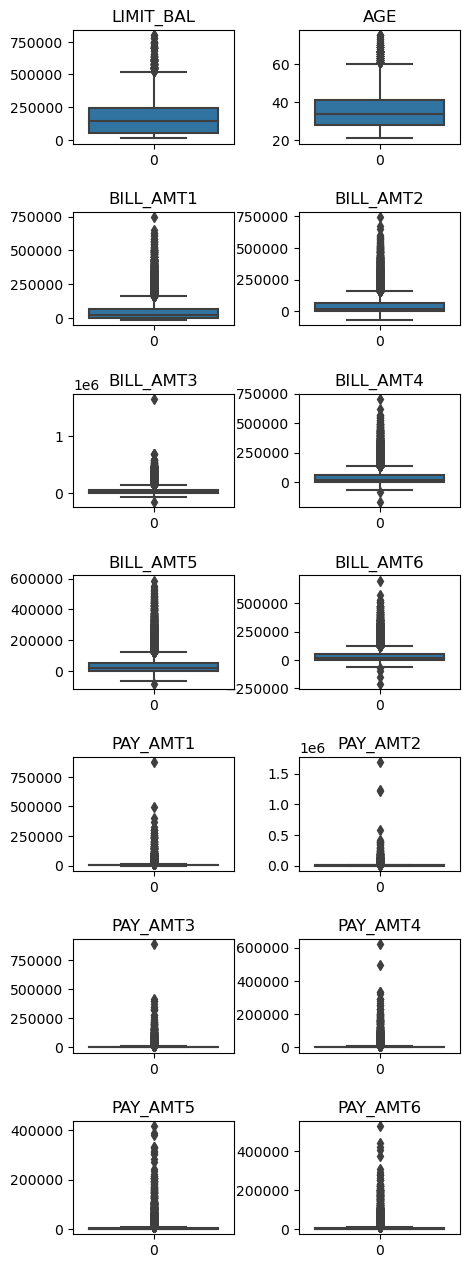

In [19]:
# Make a boxplot for categorical values
plt.figure(figsize=(5, 18))
plt.subplots_adjust(hspace=0.6,wspace=0.4)
for n, feature in enumerate(numerical):
    ax = plt.subplot(8, 2, n + 1)
    sns.boxplot(df[feature])
    plt.title(feature)

All of the numerical data is skewed and we have to handle it since we want to make a logistic regression model. The data is really skewed and have so many outliers so the least we can do is to handle the ouliers by replacing the value of outliers by 0.75 quantile + iQR * 1.5

In [20]:
for f in numerical:
    IQR=df[f].quantile(0.75)-df[f].quantile(0.25)
    upper_bridge=df[f].quantile(0.75)+(IQR*1.5)
    df.loc[df[f]>=upper_bridge,f]=upper_bridge

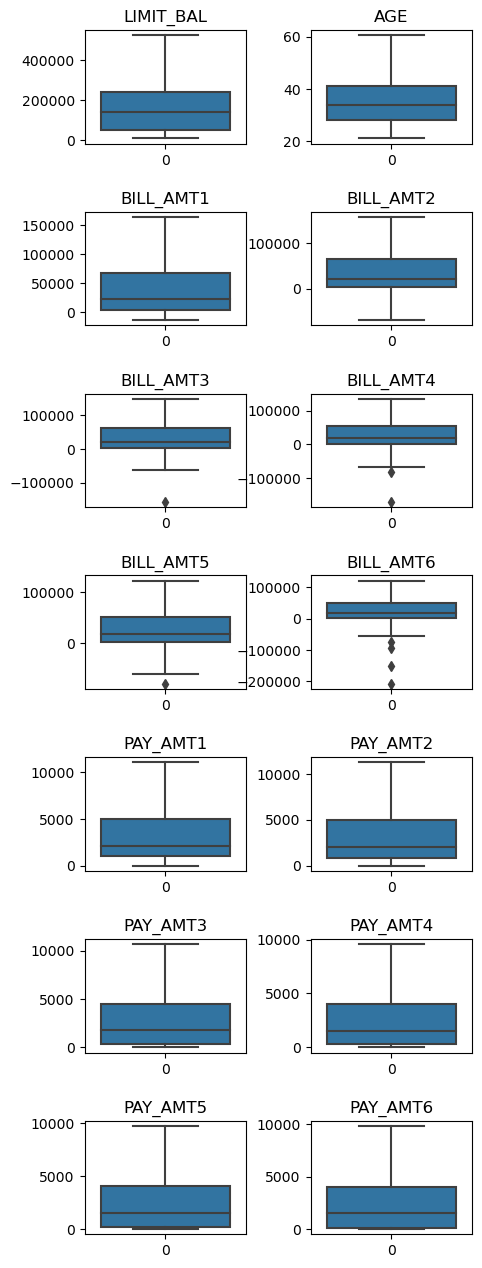

In [21]:
# Make a boxplot for categorical values
plt.figure(figsize=(5, 18))
plt.subplots_adjust(hspace=0.6,wspace=0.4)
for n, feature in enumerate(numerical):
    ax = plt.subplot(8, 2, n + 1)
    sns.boxplot(df[feature])
    plt.title(feature)

### Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()
scaler.fit(df[numerical])

MinMaxScaler()

In [24]:
df_num = pd.DataFrame(scaler.transform(df[numerical]),columns=numerical)

In [25]:
df_clean = pd.concat([df_num, df[categorical],df['default_payment_next_month']], axis=1, join='inner')

In [26]:
df_clean

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default_payment_next_month
0,0.679612,0.101266,0.197718,0.361937,0.526506,0.568744,0.440044,0.637977,1.000000,0.309354,0.323113,0.925924,0.206840,1.000000,0,2,2,-1,-1,-1,-1,-1,-1,0
1,0.446602,0.632911,0.083042,0.306614,0.515110,0.564825,0.404974,0.638723,0.000000,0.000000,0.210033,0.000000,0.232132,0.312176,0,1,2,2,2,-2,-1,0,-1,0
2,0.601942,0.506329,0.359381,0.543071,0.641926,0.673596,0.567690,0.740499,0.452049,0.177841,0.187529,0.313165,0.307188,0.152331,0,2,1,0,0,0,0,0,0,0
3,0.077670,0.075949,0.095457,0.306614,0.515110,0.557480,0.396773,0.631871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2,2,-1,-1,-2,-2,-2,-2,1
4,0.135922,0.784810,0.281134,0.387999,0.578605,0.624905,0.500491,0.696726,0.135615,0.133381,0.140647,0.107311,0.089699,0.147151,1,3,1,-1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0.077670,0.253165,0.080490,0.306614,0.515110,0.557480,0.396773,0.631871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2,2,1,-2,-2,-2,-2,-2,0
20996,0.135922,0.405063,0.470840,0.628257,0.659869,0.706550,0.634245,0.782682,0.452049,0.266762,0.187529,0.417553,0.204792,0.203108,0,2,1,0,0,0,0,0,0,0
20997,0.174757,0.784810,0.200834,0.398352,0.594121,0.634346,0.537479,0.726638,0.000000,0.320114,0.000000,0.626329,0.307188,0.000000,1,1,1,1,2,2,2,0,0,1
20998,0.155340,0.658228,0.239821,0.432807,0.609597,0.651749,0.539108,0.720892,0.180820,0.177841,0.187529,0.208776,0.204792,0.203108,0,2,1,0,0,0,0,0,0,0


# Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
X = df_clean.drop('default_payment_next_month',axis=1)
y = df_clean['default_payment_next_month']

In [29]:
X_fulltrain, X_test, y_fulltrain,y_test = train_test_split(X,y,test_size=0.2)
X_train, X_val, y_train,y_val = train_test_split(X,y,test_size=0.25)

In [30]:
X_train.reset_index(inplace=True,drop=True)
X_val.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [32]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_train)

C:\Users\Damian Marvel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
def output_result(y,y_pred):
    print('Confusion Matrix')
    print(confusion_matrix(y,y_pred))
    print(f'Accuracy : {accuracy_score(y,y_pred)}')
    print(f'Auc score Train: {roc_auc_score(y,y_pred)}')
    print(classification_report(y,y_pred))

In [34]:
output_result(y_train,y_pred)

Confusion Matrix
[[11866   382]
 [ 2628   874]]
Accuracy : 0.8088888888888889
Auc score Train: 0.6091914539083946
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     12248
           1       0.70      0.25      0.37      3502

    accuracy                           0.81     15750
   macro avg       0.76      0.61      0.63     15750
weighted avg       0.79      0.81      0.77     15750



Looking at the accuracy, precision, and recall, the model looks underfit so we need to find a way to improve the model by changing the parameter(penalty, C, solver, and max_iter).

Before, there is a warning saying that lbfgs failed to converge so we can change max_iter to 1000 hoping that it can converge now. We also have so many parameters so i thought that using penalty l1 would be a better idea since it can also do feature selection.

In [35]:
classifier = LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_train)

In [36]:
output_result(y_train,y_pred)

Confusion Matrix
[[11864   384]
 [ 2629   873]]
Accuracy : 0.8086984126984127
Auc score Train: 0.6089670323685523
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     12248
           1       0.69      0.25      0.37      3502

    accuracy                           0.81     15750
   macro avg       0.76      0.61      0.63     15750
weighted avg       0.79      0.81      0.77     15750



In [37]:
for C in 10.0 **np.arange(-2,3):
    classifier = LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear',random_state=1,C=C)
    print('C : ',C)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_train)
    output_result(y_train,y_pred)

C :  0.01
Confusion Matrix
[[11936   312]
 [ 2715   787]]
Accuracy : 0.8078095238095238
Auc score Train: 0.5996275898702654
              precision    recall  f1-score   support

           0       0.81      0.97      0.89     12248
           1       0.72      0.22      0.34      3502

    accuracy                           0.81     15750
   macro avg       0.77      0.60      0.61     15750
weighted avg       0.79      0.81      0.77     15750

C :  0.1
Confusion Matrix
[[11871   377]
 [ 2634   868]]
Accuracy : 0.8088253968253968
Auc score Train: 0.6085389155249907
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     12248
           1       0.70      0.25      0.37      3502

    accuracy                           0.81     15750
   macro avg       0.76      0.61      0.63     15750
weighted avg       0.79      0.81      0.77     15750

C :  1.0
Confusion Matrix
[[11864   384]
 [ 2630   872]]
Accuracy : 0.8086349206349206
Auc score Tr

After testing for difference values in C, there is no much improvement in accuracy. If we want to fix high bias we can try adding additional features. We can do that by one hot encoding the categorical variable.

In [38]:
for c in categorical:
    df[c] = df[c].astype('str')

In [39]:
df_clean = pd.concat([df_num, pd.get_dummies(df[categorical],drop_first=True),df['default_payment_next_month']], axis=1, join='inner')

In [40]:
X = df_clean.drop('default_payment_next_month',axis=1)
y = df_clean['default_payment_next_month']
X_fulltrain, X_test, y_fulltrain,y_test = train_test_split(X,y,test_size=0.2)
X_train, X_val, y_train,y_val = train_test_split(X,y,test_size=0.25)

In [41]:
classifier = LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_train)

In [42]:
output_result(y_train,y_pred)

Confusion Matrix
[[11720   555]
 [ 2248  1227]]
Accuracy : 0.822031746031746
Auc score Train: 0.6539398379463435
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12275
           1       0.69      0.35      0.47      3475

    accuracy                           0.82     15750
   macro avg       0.76      0.65      0.68     15750
weighted avg       0.81      0.82      0.80     15750



After using one hot encoding, the model has improved. Lets try it to X_val.

In [43]:
y_pred = classifier.predict(X_val)
output_result(y_val,y_pred)

Confusion Matrix
[[3864  216]
 [ 759  411]]
Accuracy : 0.8142857142857143
Auc score Train: 0.6491704374057315
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4080
           1       0.66      0.35      0.46      1170

    accuracy                           0.81      5250
   macro avg       0.75      0.65      0.67      5250
weighted avg       0.80      0.81      0.79      5250



In [44]:
y_pred = classifier.predict(X_test)
output_result(y_test,y_pred)

Confusion Matrix
[[3132  163]
 [ 574  331]]
Accuracy : 0.8245238095238095
Auc score Train: 0.6581384820462949
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      3295
           1       0.67      0.37      0.47       905

    accuracy                           0.82      4200
   macro avg       0.76      0.66      0.68      4200
weighted avg       0.81      0.82      0.80      4200



The result is similiar like when we model the X_train, I can conclude that our model still underfit and need further exploration to improve the model. We need to handle the skewedness when we use logistic regression since the algorithm is not robust to it.Therefore, I'm trying to use other algorithm like ensemble algorithm like xgboost

In [45]:
from sklearn.feature_extraction import DictVectorizer as dv
import xgboost as xgb

In [46]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest =  xgb.DMatrix(X_test, label=y_test)

In [47]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [48]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [49]:
y_pred = model.predict(dtrain)
pred = (y_pred>=0.5).astype('int')
output_result(y_train,pred)

Confusion Matrix
[[12237    38]
 [  558  2917]]
Accuracy : 0.9621587301587302
Auc score Train: 0.9181643687086991
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     12275
           1       0.99      0.84      0.91      3475

    accuracy                           0.96     15750
   macro avg       0.97      0.92      0.94     15750
weighted avg       0.96      0.96      0.96     15750



In [50]:
y_pred = model.predict(dval)
pred = (y_pred>=0.5).astype('int')
output_result(y_val,pred)

Confusion Matrix
[[3793  287]
 [ 727  443]]
Accuracy : 0.8068571428571428
Auc score Train: 0.6541446706887883
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4080
           1       0.61      0.38      0.47      1170

    accuracy                           0.81      5250
   macro avg       0.72      0.65      0.67      5250
weighted avg       0.79      0.81      0.79      5250



In [51]:
def parse_xgb_output(o):
    results = []

    for line in o:
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [52]:
df_score = parse_xgb_output( output.stdout.strip().split('\n'))

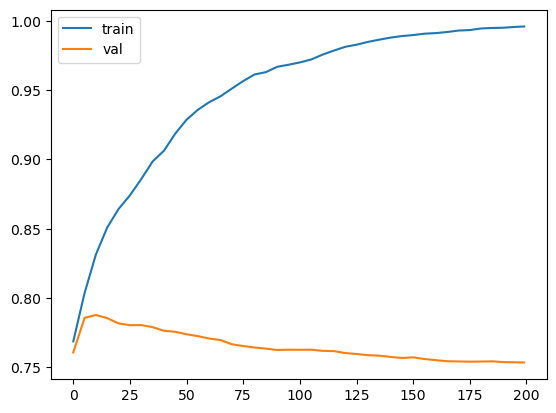

In [53]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

Looking at plot, we can conclude the model is overfit so we need to adjust some parameters.

### Tuning Learning Rate

In [54]:
scores = {}

In [55]:
%%capture output
param = [0.05,0.01,0.1,0.3,1]
num_boost_round = 200
verbose_eval = 5
for lr in param:
    xgb_params = {
        'eta': lr, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round,
                      verbose_eval=verbose_eval,
                      evals=watchlist)

In [56]:
c=0
for p in param:
    o = output.stdout.strip().split('\n')[c*int(num_boost_round/verbose_eval+1):(c+1)*int(num_boost_round/verbose_eval+1)]
    key = 'eta=%s' % (p)
    scores[key] = parse_xgb_output(o)
    c=c+1

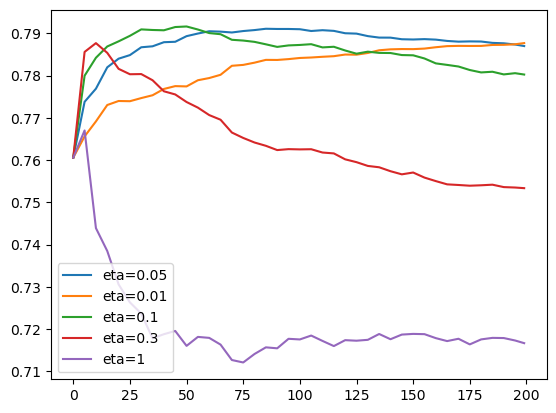

In [57]:
for lr, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=lr)
plt.legend()

eta=0.05 have a high auc and stable in each iteration

### Tuning Max Depth

In [58]:
scores={}

In [59]:
%%capture output
param = [3,4,6,10]
num_boost_round = 200
verbose_eval = 5
for p in param:
    xgb_params = {
        'eta': 0.05, 
        'max_depth': p,
        'min_child_weight': 1,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round,
                      verbose_eval=verbose_eval,
                      evals=watchlist)
    
c=0
for p in param:
    o = output.stdout.strip().split('\n')[c*int(num_boost_round/verbose_eval+1):(c+1)*int(num_boost_round/verbose_eval+1)]
    key = 'max_depth=%s' % (p)
    scores[key] = parse_xgb_output(o)
    c=c+1
    


In [60]:
c=0
for p in param:
    o = output.stdout.strip().split('\n')[c*int(num_boost_round/verbose_eval+1):(c+1)*int(num_boost_round/verbose_eval+1)]
    key = 'max_depth=%s' % (p)
    scores[key] = parse_xgb_output(o)
    c=c+1

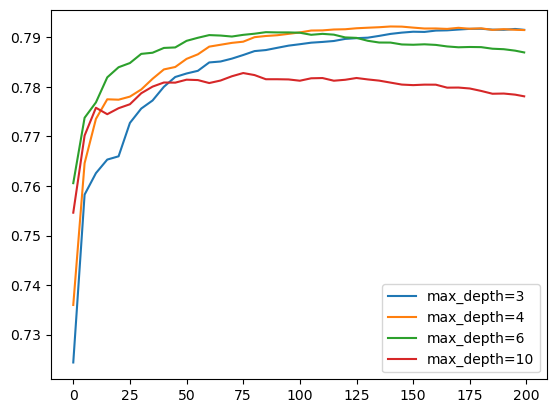

In [61]:
for p, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=p)
plt.legend()

max_depth=4 have a high auc and stable in each iteration

### Tuning Minimal Child Weight

In [62]:
scores={}

In [63]:
%%capture output
scores={}
param = [1,10,20,30]
num_boost_round = 200
verbose_eval = 5
for p in param:
    xgb_params = {
        'eta': 0.05, 
        'max_depth': 6,
        'min_child_weight': p,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round,
                      verbose_eval=verbose_eval,
                      evals=watchlist)
    
c=0
for p in param:
    o = output.stdout.strip().split('\n')[c*int(num_boost_round/verbose_eval+1):(c+1)*int(num_boost_round/verbose_eval+1)]
    key = 'min_child_weight=%s' % (p)
    scores[key] = parse_xgb_output(o)
    c=c+1
    

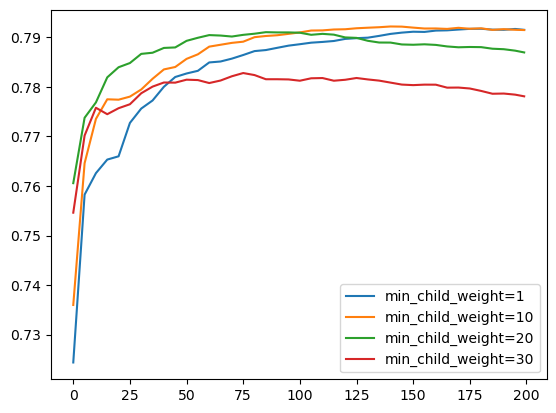

In [64]:
for p, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=p)
plt.legend()

min_child_weight=10 have a high auc and stable in each iteration

### Tuning Sub-sample

In [65]:
%%capture output
scores={}
param = [0.1,0.3,0.4,0.5]
num_boost_round = 200
verbose_eval = 5
for p in param:
    xgb_params = {
        'eta': 0.05, 
        'max_depth': 6,
        'min_child_weight': 1,
        'subsample':p,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round,
                      verbose_eval=verbose_eval,
                      evals=watchlist)
    
c=0
for p in param:
    o = output.stdout.strip().split('\n')[c*int(num_boost_round/verbose_eval+1):(c+1)*int(num_boost_round/verbose_eval+1)]
    key = 'sub_sample=%s' % (p)
    scores[key] = parse_xgb_output(o)
    c=c+1
    

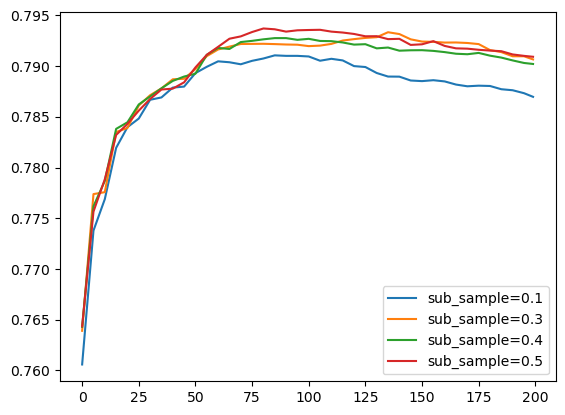

In [66]:
for p, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=p)
plt.legend()

sub_sample=0.05 have a high auc and stable in each iteration

### Tuning Col Sample By Tree

In [67]:
%%capture output
scores={}
param = [0.1,0.3,0.5,0.7,1]
num_boost_round = 200
verbose_eval = 5
for p in param:
    xgb_params = {
        'eta': 0.05, 
        'max_depth': 6,
        'min_child_weight': 1,
        'subsample':0.3,
        'colsample_bytree':p,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round,
                      verbose_eval=verbose_eval,
                      evals=watchlist)
    
c=0
for p in param:
    o = output.stdout.strip().split('\n')[c*int(num_boost_round/verbose_eval+1):(c+1)*int(num_boost_round/verbose_eval+1)]
    key = 'col_sample_bytree=%s' % (p)
    scores[key] = parse_xgb_output(o)
    c=c+1
    

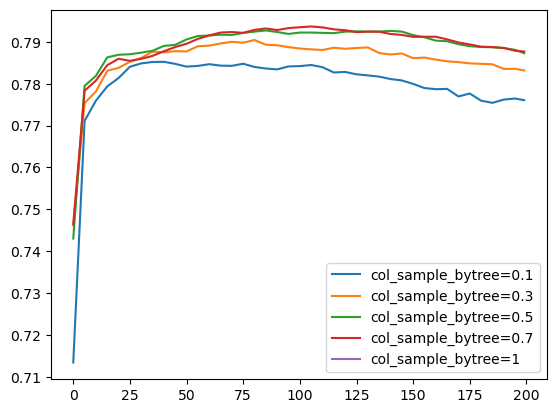

In [68]:
for p, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=p)
plt.legend()

col_sample_bytree=0.3 have a high auc and stable in each iteration

### Tuning Gamma

In [69]:
%%capture output
scores={}
param = [0,0.1,0.2,0.3]
num_boost_round = 200
verbose_eval = 5
for p in param:
    xgb_params = {
        'eta': 0.05, 
        'max_depth': 4,
        'min_child_weight': 1,
        'subsample':0.3,
        'colsample_bytree':0.3,
        'gamma':p,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round,
                      verbose_eval=verbose_eval,
                      evals=watchlist)
    
c=0
for p in param:
    o = output.stdout.strip().split('\n')[c*int(num_boost_round/verbose_eval+1):(c+1)*int(num_boost_round/verbose_eval+1)]
    key = 'gamma=%s' % (p)
    scores[key] = parse_xgb_output(o)
    c=c+1

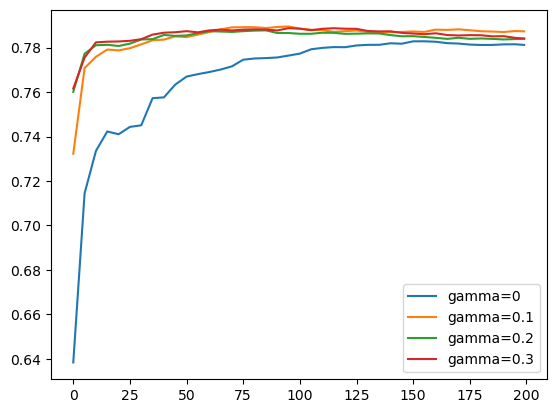

In [70]:
for p, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=p)
plt.legend()

let just use gamma=0.1

# Model

In [71]:
xgb_params = {
        'eta': 0.05, 
        'max_depth': 6,
        'min_child_weight': 10,
        'subsample':0.5,
        'colsample_bytree':0.3,
       
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

model = xgb.train(xgb_params, dtrain,num_boost_round=200)

In [72]:
y_pred = model.predict(dtrain)
pred = (y_pred>=0.5).astype('int')
output_result(y_train,pred)

Confusion Matrix
[[11808   467]
 [ 2049  1426]]
Accuracy : 0.8402539682539683
Auc score Train: 0.6861574528564521
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     12275
           1       0.75      0.41      0.53      3475

    accuracy                           0.84     15750
   macro avg       0.80      0.69      0.72     15750
weighted avg       0.83      0.84      0.82     15750



In [73]:
y_pred = model.predict(dval)
pred = (y_pred>=0.5).astype('int')
output_result(y_val,pred)

Confusion Matrix
[[3865  215]
 [ 738  432]]
Accuracy : 0.8184761904761905
Auc score Train: 0.6582673453996983
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4080
           1       0.67      0.37      0.48      1170

    accuracy                           0.82      5250
   macro avg       0.75      0.66      0.68      5250
weighted avg       0.80      0.82      0.80      5250



After tuning the parameters we get that the result from training and validation is similiar so the model is not overfitting anymore. But we can still improve our model by changing the thresholds.

In [74]:
for t in [0.4,0.45,0.5,0.55]:
    print('Threshold: ',t)
    print('Training')
    y_pred = model.predict(dtrain)
    pred = (y_pred>=t).astype('int')
    output_result(y_train,pred)
    print('Validation')
    y_pred = model.predict(dval)
    pred = (y_pred>=t).astype('int')
    output_result(y_val,pred)
    print('*'*55)
   

Threshold:  0.4
Training
Confusion Matrix
[[11490   785]
 [ 1734  1741]]
Accuracy : 0.8400634920634921
Auc score Train: 0.7185280370408358
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12275
           1       0.69      0.50      0.58      3475

    accuracy                           0.84     15750
   macro avg       0.78      0.72      0.74     15750
weighted avg       0.83      0.84      0.83     15750

Validation
Confusion Matrix
[[3750  330]
 [ 633  537]]
Accuracy : 0.8165714285714286
Auc score Train: 0.6890460030165912
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4080
           1       0.62      0.46      0.53      1170

    accuracy                           0.82      5250
   macro avg       0.74      0.69      0.71      5250
weighted avg       0.80      0.82      0.81      5250

*******************************************************
Threshold:  0.45
Training
Conf

Since we used so many metrics, the result from every threshold varied. But we are classifying wether user will default or not, so we should focus more on recall metrics. It will be important for us to identify every user who is going to default. Therefore the theshold that we will choose is 0.4.

In [75]:
y_pred = model.predict(dtest)
pred = (y_pred>=0.4).astype('int')
output_result(y_test,pred)

Confusion Matrix
[[3072  223]
 [ 444  461]]
Accuracy : 0.8411904761904762
Auc score Train: 0.7208569823690675
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3295
           1       0.67      0.51      0.58       905

    accuracy                           0.84      4200
   macro avg       0.77      0.72      0.74      4200
weighted avg       0.83      0.84      0.83      4200

